In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data=r"C:\Users\nevta\Desktop\Datasets\winequality-red.csv"
df=pd.read_csv(data)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [95]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [97]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


It seems almost all of them are noramlly distributed.

C:\Users\nevta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

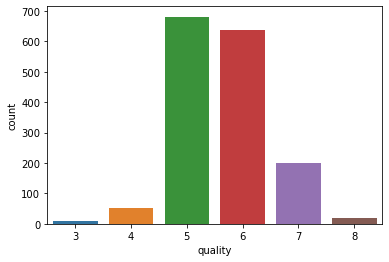

In [98]:
sns.countplot(df["quality"])

C:\Users\nevta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

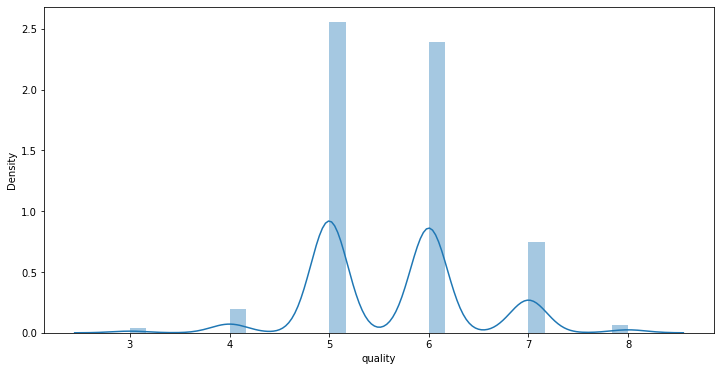

In [99]:
plt.figure(figsize=(12,6))
sns.distplot(df["quality"])

I will classify 3,4, 5 and 6 as a lower_than_average, while I will classify7 and 8 as a higher_than_average

In [100]:
classification={3:"lower_than_average",4:"lower_than_average",5:"lower_than_average",6:"higher_than_average",7:"higher_than_average",8:"higher_than_average"}

In [101]:
df["Target"]=df["quality"].map(classification)

In [102]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Target                  False
dtype: bool

<AxesSubplot:xlabel='Target', ylabel='count'>

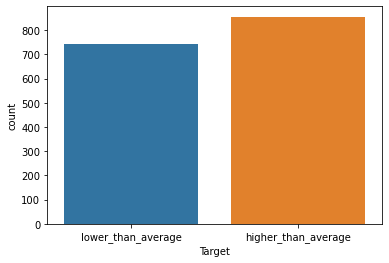

In [103]:
sns.countplot(data=df,x="Target")

They are almost the same. It is important for machine learning

In [104]:
dummies=pd.get_dummies(df["Target"],drop_first=True)
dummies

,lower_than_average
0,1
1,1
2,1
3,0
4,1
...,...
1594,1
1595,0
1596,0
1597,1


In [105]:
df["is_lower_average"]=dummies

In [106]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target,is_lower_average
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,lower_than_average,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,lower_than_average,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,lower_than_average,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,higher_than_average,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,lower_than_average,1


<AxesSubplot:>

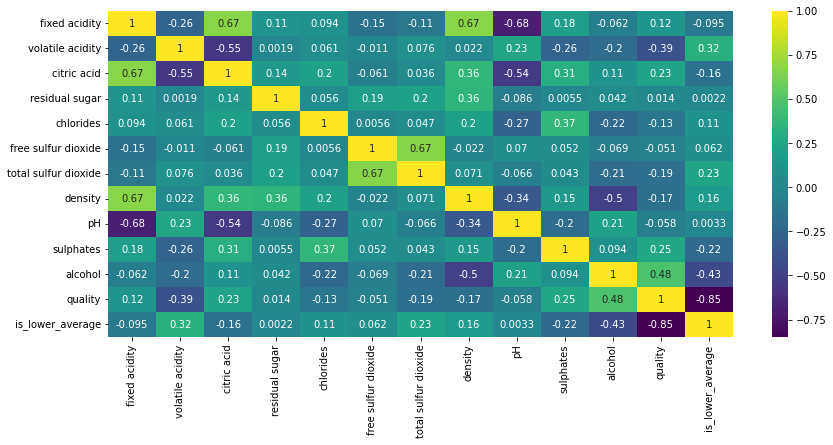

In [107]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),cmap="viridis",annot=True)

In [108]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Target', 'is_lower_average'],
      dtype='object')

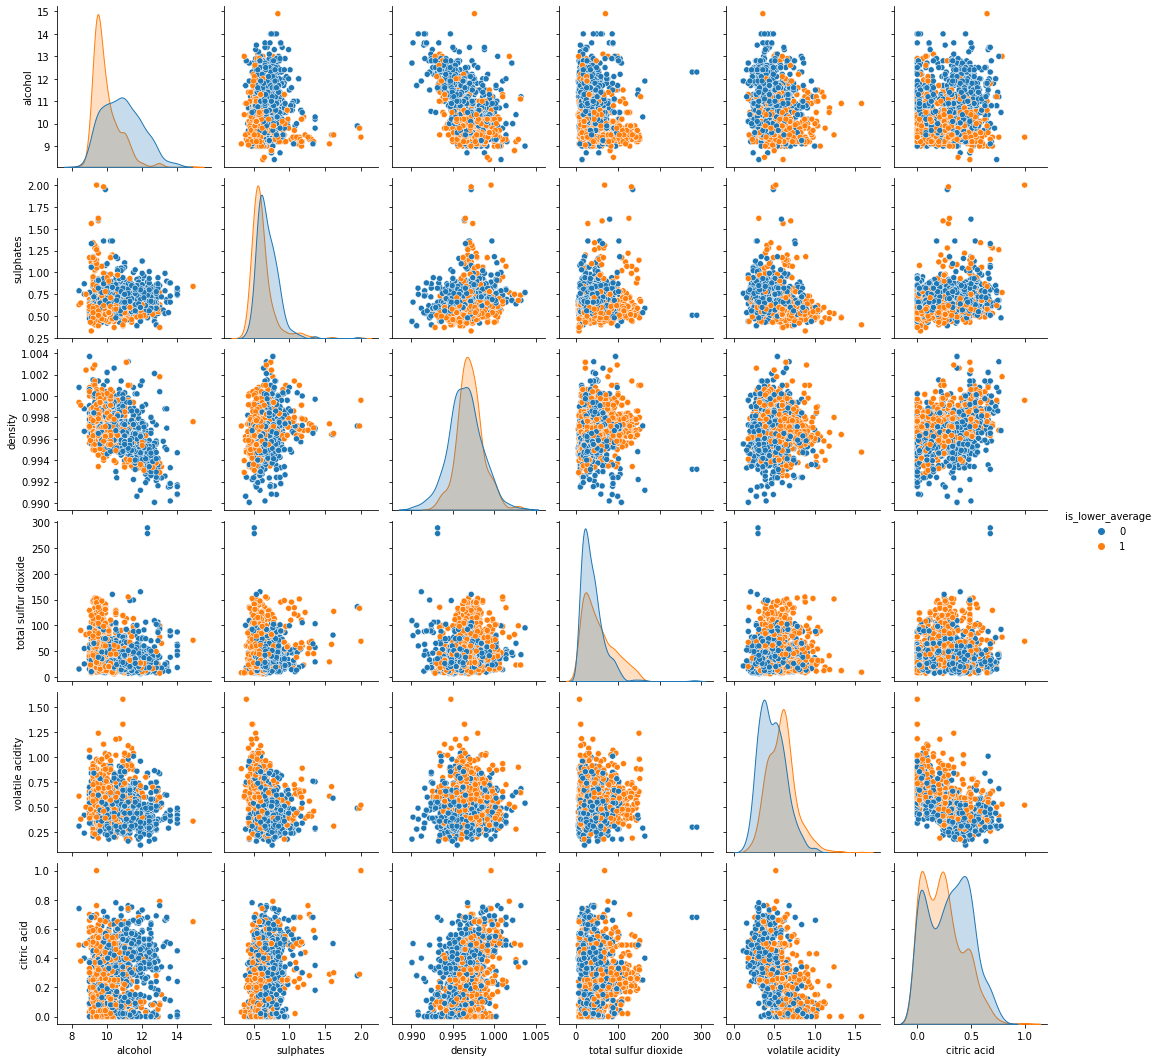

In [109]:
sns.pairplot(df[["alcohol","sulphates","density","total sulfur dioxide","volatile acidity","citric acid","is_lower_average"]], hue='is_lower_average')

Residual sugar pH and free sulfur dioxide have lower correlation, so I will catogorize them so to find better correlations.

<AxesSubplot:xlabel='pH', ylabel='Count'>

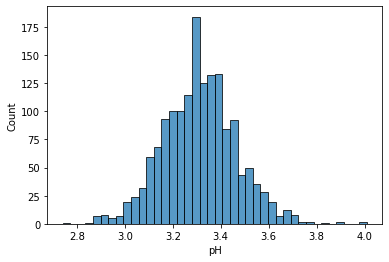

In [110]:
sns.histplot(df["pH"])

pH's range is already in the acidic class, so it would not be logical to classify it. 

<AxesSubplot:xlabel='residual sugar', ylabel='is_lower_average'>

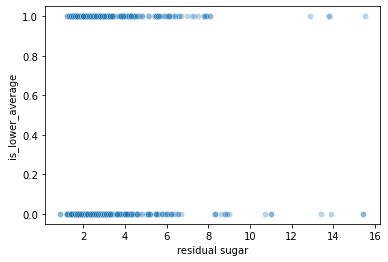

In [111]:
sns.scatterplot(data=df,x="residual sugar",y="is_lower_average",alpha=0.3)

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

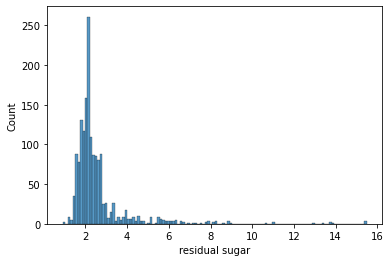

In [112]:
sns.histplot(df["residual sugar"])


According to whicherridge, they classify 0 – 4 g/L as a "dry", 5 – 11 g/L as "off Dry" and  12 – 35 g/L as "medium sweet"   

In [113]:
bins=[0,4.5,11.5,35]
df["residual sugar_cut"]=pd.cut(df["residual sugar"], bins, labels=["dry","off Dry","medium sweet"])
df["residual sugar_cut"]


0       dry
1       dry
2       dry
3       dry
4       dry
       ... 
1594    dry
1595    dry
1596    dry
1597    dry
1598    dry
Name: residual sugar_cut, Length: 1599, dtype: category
Categories (3, object): ['dry' < 'off Dry' < 'medium sweet']

<AxesSubplot:xlabel='residual sugar', ylabel='is_lower_average'>

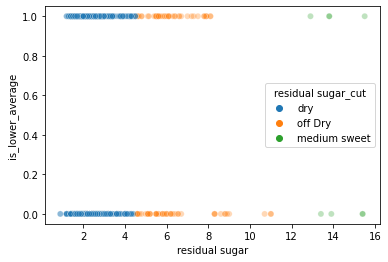

In [114]:
sns.scatterplot(data=df,x="residual sugar",y="is_lower_average",alpha=0.3,hue="residual sugar_cut")

In [115]:
df=pd.concat([df, pd.get_dummies(df["residual sugar_cut"])], axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target,is_lower_average,residual sugar_cut,dry,off Dry,medium sweet
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,lower_than_average,1,dry,1,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,lower_than_average,1,dry,1,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,lower_than_average,1,dry,1,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,higher_than_average,0,dry,1,0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,lower_than_average,1,dry,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,lower_than_average,1,dry,1,0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,higher_than_average,0,dry,1,0,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,higher_than_average,0,dry,1,0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,lower_than_average,1,dry,1,0,0


<AxesSubplot:>

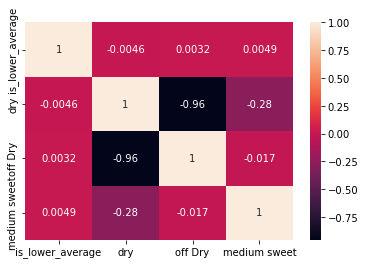

In [116]:
sns.heatmap(df[["is_lower_average","dry","off Dry","medium sweet"]].corr(),annot=True)

There is still no correlations, so I will not add to model.

<AxesSubplot:xlabel='is_lower_average', ylabel='free sulfur dioxide'>

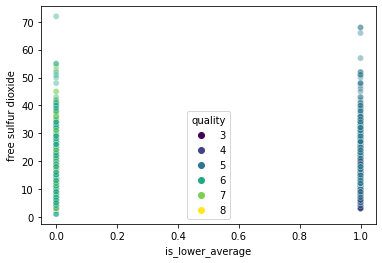

In [117]:
sns.scatterplot(data=df,x="is_lower_average", y="free sulfur dioxide",alpha=0.4,hue="quality",palette="viridis")

Hence, There is not clear differences in distribution, so it would be not useful to classify it.

# Machine-Learning 

In [118]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['quality', 'Target', 'is_lower_average','pH','dry', 'off Dry','residual sugar','residual sugar_cut','free sulfur dioxide'], axis=1)
y=df["is_lower_average"]

I have just added medium sweet as a one of the variable becuase it has double correlation than residual sugar even if it will not be useful for our model.

In [119]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Target', 'is_lower_average',
       'residual sugar_cut', 'dry', 'off Dry', 'medium sweet'],
      dtype='object')

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler=StandardScaler()
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn=KNeighborsClassifier()

In [123]:
operations=[("scaler",scaler), ("knn",knn)]

In [124]:
pipe=Pipeline(operations)
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
k= list(range(1,30))

In [127]:
param_grid={"knn__n_neighbors":k}

In [128]:
model=GridSearchCV(pipe,param_grid, cv=5,scoring="accuracy")
                   

In [129]:
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [130]:
model.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])>

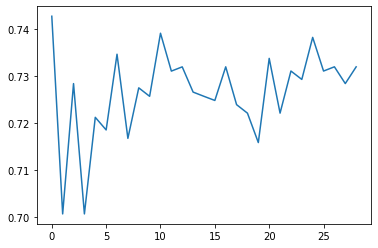

In [131]:
plt.plot(model.cv_results_["mean_test_score"])

# Evaluation

In [132]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report,accuracy_score

In [133]:
y_pred=model.predict(X_test)

In [134]:
accuracy_score(y_test,y_pred)

0.7645833333333333

In [135]:
confusion_matrix(y_test,y_pred)

array([[203,  45],
       [ 68, 164]], dtype=int64)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       248
           1       0.78      0.71      0.74       232

    accuracy                           0.76       480
   macro avg       0.77      0.76      0.76       480
weighted avg       0.77      0.76      0.76       480

